In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib


In [17]:
# Download the flower dataset
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, untar=True)
data_dir = pathlib.Path(data_dir)


In [18]:
batch_size = 32
img_height = 180
img_width = 180

# Create training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.


In [19]:
class_names = train_ds.class_names
print("Class names:", class_names)


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Class names: ['flower_photos']


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  # output layer: number of flower categories
])


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 898ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 885ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 869ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 859ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 855ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 858ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 854ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


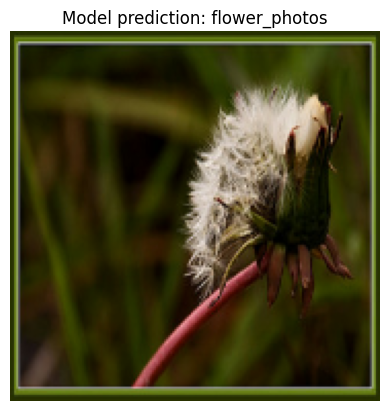

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random image from the validation set
for images, labels in val_ds.take(1):
    img = images[0].numpy()
    true_label = labels[0].numpy()

# Prepare the image for prediction
img_array = tf.expand_dims(img, 0)  # Create batch axis

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Show image with prediction
plt.imshow(img / 255.0)  # divide by 255 to display properly
plt.title(f"Model prediction: {predicted_class}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


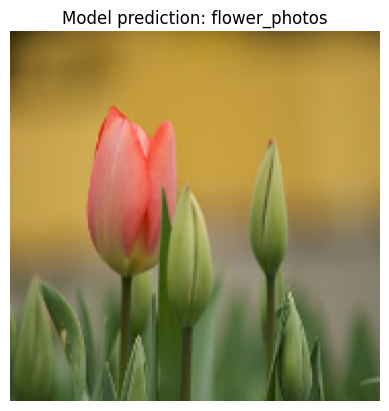

In [29]:
# Pick the 10th image from the validation set
for images, labels in val_ds.skip(13).take(1):
    img = images[0].numpy()
    true_label = labels[0].numpy()

# Prepare for prediction
img_array = tf.expand_dims(img, 0)

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Show result
plt.imshow(img / 255.0)
plt.title(f"Model prediction: {predicted_class}")
plt.axis("off")
plt.show()
